# Loading and plotting Landsat scenes

In this lesson, we'll:

* Learn how to load the data from a Landsat 8 or 9 scene that was downloaded from [EarthExplorer](https://earthexplorer.usgs.gov/). 
* Access the information from the scene like the surface reflectance/temperature values, the scene metadata, and coordinate information.
* Visualize the scene by plotting each band individually.

## Importing

First step is almost always to import all of the libraries we're planing on using later on. When dealing with Landsat satellite images, we'll very often want:

* [numpy](https://numpy.org): the basis of everything involving data in Python.
* [matplotlib](https://matplotlib.org/): the most popular Python plotting library (for a good reason, it's awesome).
* [xarray](https://xarray.dev/): the best way to deal with geospatial raster data in Python.
* [xlandsat](https://www.compgeolab.org/xlandsat/): a library developed by us at the [CompGeoLab](https://www.compgeolab.org/) for loading the Landsat scenes into `xarray.Dataset` and making composites.
* [pooch](https://www.fatiando.org/pooch): for downloading data from a variety of sources.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xlandsat as xls
import pooch

## Download some data 

Full Landsat scenes can be quite large (500-1000 Mb) so we won't be downloading full scenes from [EarthExplorer](https://earthexplorer.usgs.gov/) all the time. Instead, we'll use a set of curated and cropped scenes that have been uploaded to [figshare](https://figshare.com/). A positive consequence is that we can use Pooch to download these scenes directly from figshare and onto our computers. All we need to know are:

1. The [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier) of the figshare dataset.
1. The name of the file we want to download.
1. The [MD5](https://en.wikipedia.org/wiki/MD5) hash of the file so that Pooch can check if the download was corrupted.

Here, we'll use a cropped Landsat 8 scene from the December 2015 eruption of [Momotombo](https://en.wikipedia.org/wiki/Momotombo), Nicaragua. The scenes are stored at https://doi.org/10.6084/m9.figshare.21931089.v2. You can find the file name of the cropped scene and its MD5 hash by following this link.

The code below will:

1. Download the scene to your computer in a `.tar.gz` archive (like a compressed zip file).
1. Assign the path to the downloaded file to the `path` variable.
1. Check that the MD5 of the downloaded file matches the one we provided (for safety).
1. If run again, the code won't repeat the download because it already finds the data on the computer.

In [2]:
doi = "10.6084/m9.figshare.21931089.v2"
file_name = "LC08_L2SP_017051_20151205_20200908_02_T1-cropped.tar.gz"
md5 = "8cc2e4c15e65940a7152fc1c8b412aa9"

path = pooch.retrieve(
    url=f"doi:{doi}/{file_name}",
    known_hash=f"md5:{md5}",
    progressbar=True,
    path=".",  # This means the current folder where this notebook is.
    fname=file_name,
)
print(path)

/home/leo/src/remote-sensing/practicals/LC08_L2SP_017051_20151205_20200908_02_T1-cropped.tar.gz


That that have a scene downloaded to our computer, we can read all of the data inside it using `xlandsat`.

---

### 🤔 **Your turn** 

Open the downloaded archive to see what's inside. You'll find that the bands are stored in individual `.TIF` files (an image format like PNG or JPEG) and the metadata (including coordinate information) are stored in a file ending in `_MTL.txt`. This is what you'd get if you downloaded the scene from EarthExplorer (plus a few extra files). `xlandsat` does the work of loading the TIF files and reading the metadata to create a single [`xarray.Dataset`](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset).

> 💡 **Tip:** On Windows, you'll need software like [7zip](https://www.7-zip.org/) or [WinRAR](https://www.rarlab.com/) to open the `.tar.gz` file.


---

## Load the data from the scene

We'll use the [`xlandsat.load_scene`](https://www.compgeolab.org/xlandsat/latest/api/generated/xlandsat.load_scene.html#xlandsat.load_scene) function to extract the data from the `.tar.gz` archive so that we can manipulate it and plot it.

In [3]:
scene = xls.load_scene(path)

Placing the `scene` variable at the end of a cell on a Jupyter notebook will give you a preview of what's inside it.

In [4]:
scene

<xarray.Dataset>
Dimensions:   (easting: 467, northing: 333)
Coordinates:
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Data variables:
    blue      (northing, easting) float16 -0.05554 -0.05481 ... 0.07788 0.07727
    green     (northing, easting) float16 0.04834 0.05066 ... 0.1056 0.1027
    red       (northing, easting) float16 0.006226 0.01105 ... 0.1163 0.1045
    nir       (northing, easting) float16 0.01483 0.02124 ... 0.2435 0.2367
    swir1     (northing, easting) float16 0.06189 0.06409 ... 0.2098 0.1976
    swir2     (northing, easting) float16 0.06519 0.06628 ... 0.1571 0.1527
    thermal   (northing, easting) float16 293.5 293.5 293.8 ... 311.0 312.0
Attributes: (12/19)
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2015-12-05 (path/row=17/51)
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_017051_20151205_20200908_02_T1
    processing_level:           L2SP
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2015-12-05
    scene_center_time:          16:06:06.8773380Z
    wrs_path:                   17
    wrs_row:                    51
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

The preview tells us that this scene has 467 pixels in the West-East direction and 333 in the South-North direction. It also tells us the easting and northing coordinates of each pixel. The "Data variables" are the bands, which are 2D arrays of dimension (northing, easting). 

---

### 🤔 **Your turn** 

Explore the metadata presented in the preview of our scene above to answer the following questions:

1. What are the projection and datum used for the coordinates of this scene?
1. What is the exact date when this scene was captured?
1. Is this a Level 1 or Level 2 data product?

---

## Accessing scene elements

The preview lets us browse the elements of the scene but it can't be used to perform computations on those values. To do that, we need to be able to access individual elements from the `scene` variable. We can gain access to everything in the scene by using `scene.NAME_OF_VARIABLE` where `NAME_OF_VARIABLE` is the name of what we want to access.

For example, this is how we access the blue band:

In [5]:
scene.blue

<xarray.DataArray 'blue' (northing: 333, easting: 467)>
array([[-0.05554, -0.0548 , -0.05423, ...,  0.06726,  0.0658 ,  0.06445],
       [-0.05414, -0.05737, -0.06018, ...,  0.0647 ,  0.06042,  0.0603 ],
       [-0.0563 , -0.0637 , -0.06915, ...,  0.05823,  0.05725,  0.057  ],
       ...,
       [ 0.0696 ,  0.068  ,  0.0657 , ...,  0.0718 ,  0.06885,  0.0748 ],
       [ 0.0696 ,  0.0691 ,  0.0692 , ...,  0.07117,  0.0768 ,  0.07983],
       [ 0.067  ,  0.0698 ,  0.07007, ...,  0.06775,  0.0779 ,  0.0773 ]],
      dtype=float16)
Coordinates:
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Attributes:
    long_name:     blue
    units:         reflectance
    number:        2
    filename:      LC08_L2SP_017051_20151205_20200908_02_T1_SR_B2.TIF
    scaling_mult:  2e-05
    scaling_add:   -0.1

We could also do the same thing using a string with the name of the variable:

In [6]:
scene["blue"]

<xarray.DataArray 'blue' (northing: 333, easting: 467)>
array([[-0.05554, -0.0548 , -0.05423, ...,  0.06726,  0.0658 ,  0.06445],
       [-0.05414, -0.05737, -0.06018, ...,  0.0647 ,  0.06042,  0.0603 ],
       [-0.0563 , -0.0637 , -0.06915, ...,  0.05823,  0.05725,  0.057  ],
       ...,
       [ 0.0696 ,  0.068  ,  0.0657 , ...,  0.0718 ,  0.06885,  0.0748 ],
       [ 0.0696 ,  0.0691 ,  0.0692 , ...,  0.07117,  0.0768 ,  0.07983],
       [ 0.067  ,  0.0698 ,  0.07007, ...,  0.06775,  0.0779 ,  0.0773 ]],
      dtype=float16)
Coordinates:
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06
Attributes:
    long_name:     blue
    units:         reflectance
    number:        2
    filename:      LC08_L2SP_017051_20151205_20200908_02_T1_SR_B2.TIF
    scaling_mult:  2e-05
    scaling_add:   -0.1

Notice that the bands themselves are [`xarray.DataArray`](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray) objects that also carry with them the coordinates and some metadata. These are very useful because they let you do mathematical operations that take into account the coordinates of each pixel. For example, we can add two bands together (which is how we will calculate **indices**) on a pixel-by-pixel basis.

In [7]:
band_add = scene.blue + scene.red
band_add

<xarray.DataArray (northing: 333, easting: 467)>
array([[-0.04932, -0.04376, -0.03854, ...,  0.1399 ,  0.1342 ,  0.1315 ],
       [-0.04962, -0.05048, -0.0489 , ...,  0.1304 ,  0.1227 ,  0.1227 ],
       [-0.0499 , -0.05664, -0.06165, ...,  0.11914,  0.1173 ,  0.1166 ],
       ...,
       [ 0.1554 ,  0.1592 ,  0.1566 , ...,  0.1637 ,  0.1608 ,  0.1742 ],
       [ 0.1576 ,  0.16   ,  0.1584 , ...,  0.1597 ,  0.1838 ,  0.19   ],
       [ 0.1548 ,  0.1586 ,  0.1573 , ...,  0.1519 ,  0.1942 ,  0.1818 ]],
      dtype=float16)
Coordinates:
  * easting   (easting) float64 5.44e+05 5.44e+05 ... 5.58e+05 5.58e+05
  * northing  (northing) float64 1.369e+06 1.369e+06 ... 1.379e+06 1.379e+06

Sometimes, you may need to get at the actual values of reflectance per pixel (stored in a numpy array). The following code accesses the underlying numpy array. The same should work for any variable in the scene as well as the coordinates.

In [8]:
scene.blue.values

array([[-0.05554, -0.0548 , -0.05423, ...,  0.06726,  0.0658 ,  0.06445],
       [-0.05414, -0.05737, -0.06018, ...,  0.0647 ,  0.06042,  0.0603 ],
       [-0.0563 , -0.0637 , -0.06915, ...,  0.05823,  0.05725,  0.057  ],
       ...,
       [ 0.0696 ,  0.068  ,  0.0657 , ...,  0.0718 ,  0.06885,  0.0748 ],
       [ 0.0696 ,  0.0691 ,  0.0692 , ...,  0.07117,  0.0768 ,  0.07983],
       [ 0.067  ,  0.0698 ,  0.07007, ...,  0.06775,  0.0779 ,  0.0773 ]],
      dtype=float16)

The metadata shown in "Attributes" is stored in the `scene.attrs` variable. It behaves like a Python dictionary. So you can get a list of the keys it contains and access individual elements the same was a dictionary.

In [9]:
print("Keys:", scene.attrs.keys())
print()
print("Title:", scene.attrs["title"])

Keys: dict_keys(['Conventions', 'title', 'digital_object_identifier', 'origin', 'landsat_product_id', 'processing_level', 'collection_number', 'collection_category', 'spacecraft_id', 'sensor_id', 'map_projection', 'utm_zone', 'datum', 'ellipsoid', 'date_acquired', 'scene_center_time', 'wrs_path', 'wrs_row', 'mtl_file'])

Title: Landsat 8 scene from 2015-12-05 (path/row=17/51)


---

### 🤔 **Your turn** 

Calculate the West-East and the North-South total size of the scene in kilometers (i.e., how many kilometers by how many kilometers is the scene). 

> 💡 **Tip:** Use the variable accessing methods learned above. In which variables arethe information you need stored?

> 💡 **Tip:** The [`numpy.ptp`](https://numpy.org/doc/stable/reference/generated/numpy.ptp.html) function simplifies tasks like this one.

---

## Plotting bands

One of the advantages of using `xarray` to store the scene is that it makes plotting a lot easier than with pure matplotlib. The `xarray.DataArray` objects (the bands in our case) can be plotted with the following code:

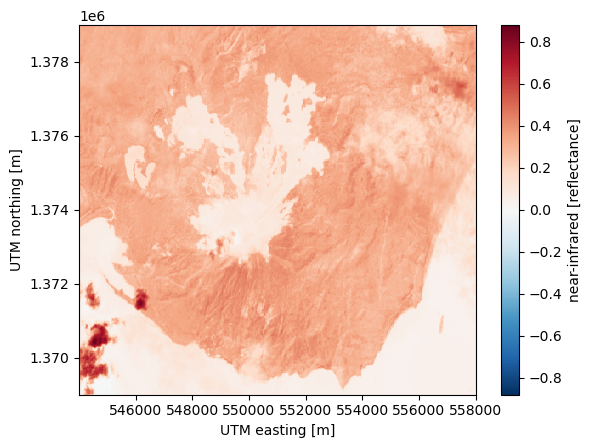

In [10]:
scene.nir.plot.pcolormesh()

Notice how xarray automatically adds the coordinate labels (taken from the metadata in `scene.nir`), adds a colorbar with a label (also from the metadata), and picks an appropriate colormap for our data (the diverging red-white-blue colormap). This plot is nice by default and contains most of what you'll need. However, we can make tweaks and add other plot elements on top. Under the hood, xarray is using matplotlib to do the plotting.

For example, this is how we can make a composite figure with 3 plots, one for each of the infrared bands.

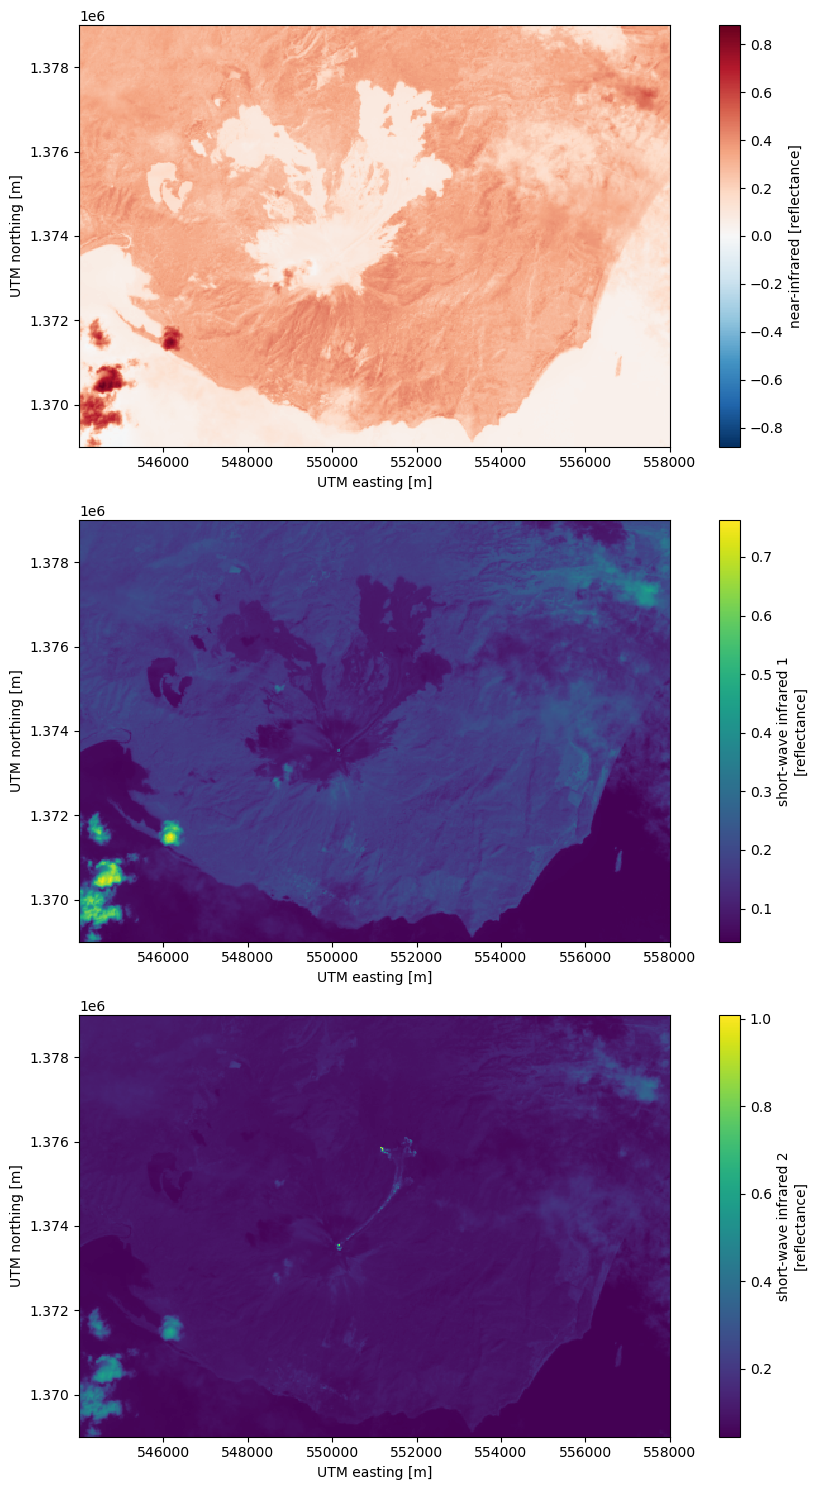

In [11]:
fig = plt.figure(figsize=(10, 15))

ax = plt.subplot(3, 1, 1)
scene.nir.plot.pcolormesh(ax=ax)
ax.set_aspect("equal")  # This makes the pixels square

ax = plt.subplot(3, 1, 2)
scene.swir1.plot.pcolormesh(ax=ax)
ax.set_aspect("equal")

ax = plt.subplot(3, 1, 3)
scene.swir2.plot.pcolormesh(ax=ax)
ax.set_aspect("equal")

plt.tight_layout()  # Remove empty space around figures

A better way to make those subplots is using a `for` loop to avoid the repeated code:

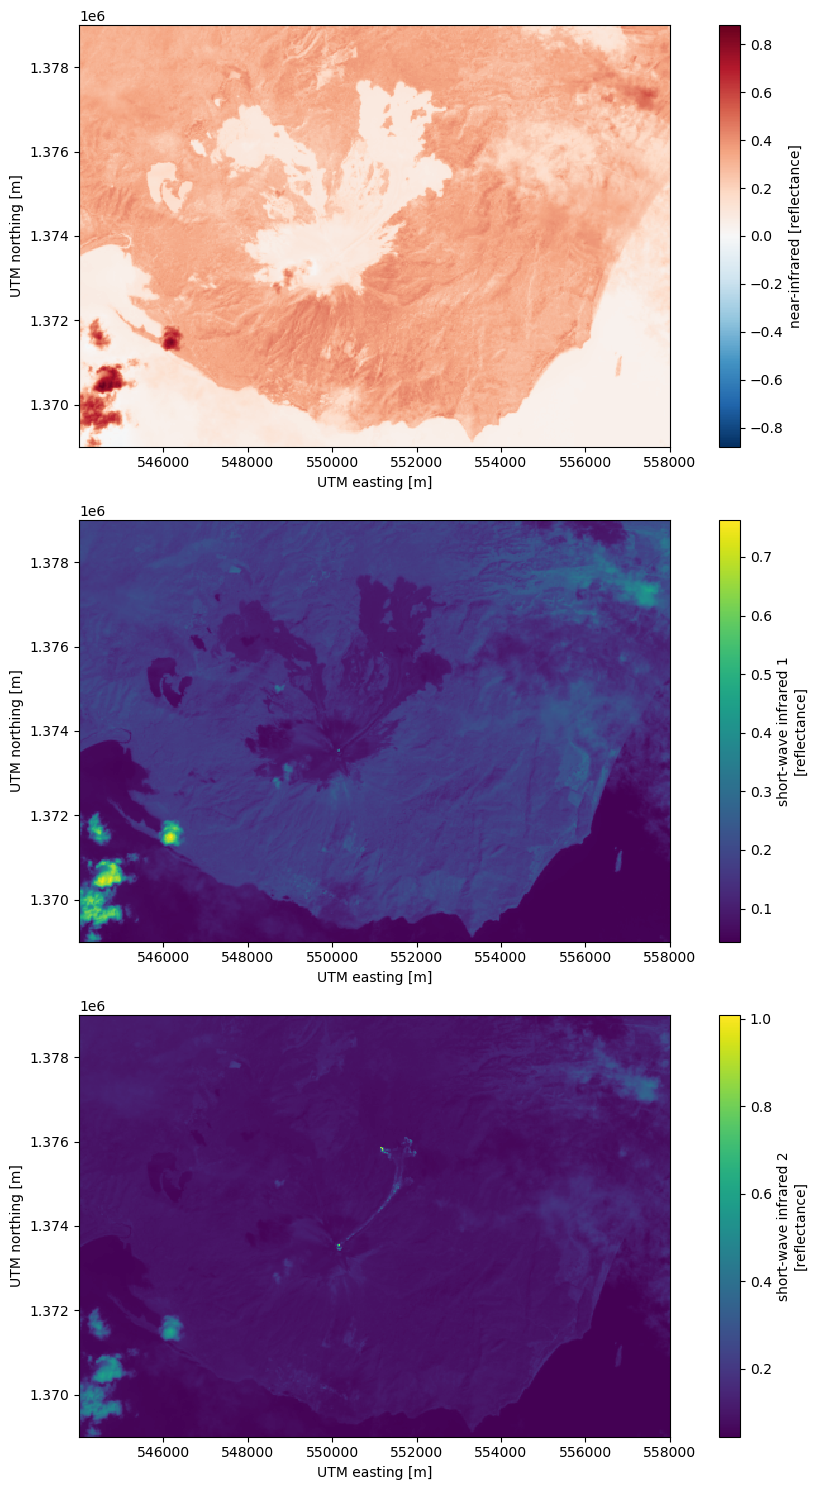

In [12]:
fig = plt.figure(figsize=(10, 15))

bands = ["nir", "swir1", "swir2"]
for i in range(3):
    ax = plt.subplot(3, 1, i + 1)
    scene[bands[i]].plot.pcolormesh(ax=ax)
    ax.set_aspect("equal")
    
plt.tight_layout()  # Out of the loop to only call it once

> 💡 **Tip:** Find out more about how to plot with xarray and matplotlib at: https://docs.xarray.dev/en/stable/user-guide/plotting.html

> 💡 **Tip:** Read this guide on how to choose appropriate colormaps for your data: https://matplotlib.org/stable/tutorials/colors/colormaps.html

---

### 🤔 **Your turn** 

Make a figure with one subplot for each of the 7 bands in this scene. What do you see in the images? Try to give an interpretation of what you see based on the reflective properties of materials and thermal emissions.

> 💡 **Tip:** Remember that vegetation reflects strongly on NIR and weakly on red, while barren rock (particularly mafic volcanic rocks) reflect weakly on almost all wavelengths.